# 多层感知机的基本知识
深度学习主要关注多层模型。在这里，我们将以多层感知机（multilayer perceptron，MLP）为例，介绍多层神经网络的概念。

### 隐藏层
下图展示了一个多层感知机的神经网络图，它含有一个隐藏层，该层中有5个隐藏单元。

![Image Name](https://cdn.kesci.com/upload/image/q5ho684jmh.png)

### 表达公式
具体来说，给定一个小批量样本$\boldsymbol{X} \in \mathbb{R}^{n \times d}$，其批量大小为$n$，输入个数为$d$。假设多层感知机只有一个隐藏层，其中隐藏单元个数为$h$。记隐藏层的输出（也称为隐藏层变量或隐藏变量）为$\boldsymbol{H}$，有$\boldsymbol{H} \in \mathbb{R}^{n \times h}$。因为隐藏层和输出层均是全连接层，可以设隐藏层的权重参数和偏差参数分别为$\boldsymbol{W}_h \in \mathbb{R}^{d \times h}$和 $\boldsymbol{b}_h \in \mathbb{R}^{1 \times h}$，输出层的权重和偏差参数分别为$\boldsymbol{W}_o \in \mathbb{R}^{h \times q}$和$\boldsymbol{b}_o \in \mathbb{R}^{1 \times q}$。

我们先来看一种含单隐藏层的多层感知机的设计。其输出$\boldsymbol{O} \in \mathbb{R}^{n \times q}$的计算为


$$
 \begin{aligned} \boldsymbol{H} &= \boldsymbol{X} \boldsymbol{W}_h + \boldsymbol{b}_h,\\ \boldsymbol{O} &= \boldsymbol{H} \boldsymbol{W}_o + \boldsymbol{b}_o, \end{aligned}
$$


也就是将隐藏层的输出直接作为输出层的输入。如果将以上两个式子联立起来，可以得到


$$
 \boldsymbol{O} = (\boldsymbol{X} \boldsymbol{W}_h + \boldsymbol{b}_h)\boldsymbol{W}_o + \boldsymbol{b}_o = \boldsymbol{X} \boldsymbol{W}_h\boldsymbol{W}_o + \boldsymbol{b}_h \boldsymbol{W}_o + \boldsymbol{b}_o. 
$$


从联立后的式子可以看出，虽然神经网络引入了隐藏层，却依然等价于一个单层神经网络：其中输出层权重参数为$\boldsymbol{W}_h\boldsymbol{W}_o$，偏差参数为$\boldsymbol{b}_h \boldsymbol{W}_o + \boldsymbol{b}_o$。不难发现，即便再添加更多的隐藏层，以上设计依然只能与仅含输出层的单层神经网络等价。

### 激活函数
上述问题的根源在于全连接层只是对数据做仿射变换（affine transformation），而多个仿射变换的叠加仍然是一个仿射变换。解决问题的一个方法是引入非线性变换，例如对隐藏变量使用按元素运算的非线性函数进行变换，然后再作为下一个全连接层的输入。这个非线性函数被称为激活函数（activation function）。

下面我们介绍几个常用的激活函数：


### ReLu函数

In [1]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")

In [2]:
def xyplot(x_vals, y_vals, name):
    plt.plot(x_vals.detach().numpy(), y_vals.detach().numpy())
    plt.xlabel('x')
    plt.ylabel(name + '(x)')

/home/eagle-402/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  """Entry point for launching an IPython kernel.


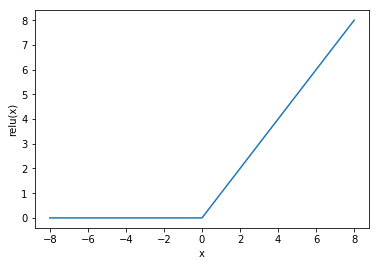

In [3]:
x = torch.range(-8.0,8.0,0.1, requires_grad=True)
y = x.relu()
xyplot(x,y,'relu')

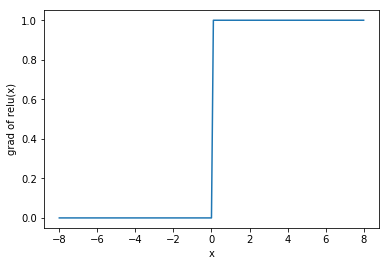

In [4]:
y.sum().backward()
xyplot(x, x.grad, 'grad of relu')

### sigmoid 函数

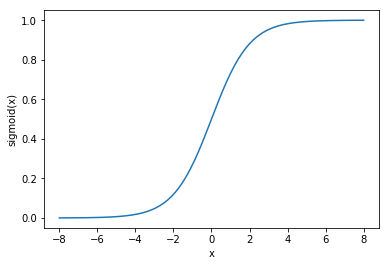

In [5]:
y = x.sigmoid()
xyplot(x,y,'sigmoid')

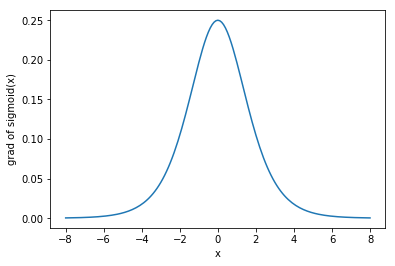

In [6]:
x.grad.zero_()
y.sum().backward()
xyplot(x, x.grad, 'grad of sigmoid')

### tanh 函数

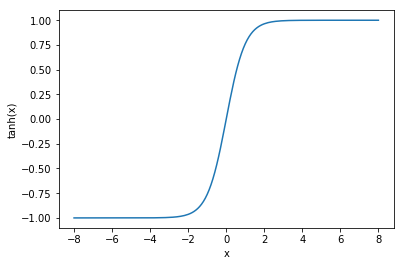

In [7]:
y = x.tanh()
xyplot(x, y, 'tanh')

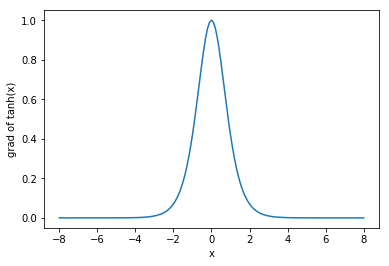

In [8]:
x.grad.zero_()
y.sum().backward()
xyplot(x, x.grad, 'grad of tanh')

### 关于激活函数的选择

ReLu函数是一个通用的激活函数，目前在大多数情况下使用。但是，ReLU函数只能在隐藏层中使用。

用于分类器时，sigmoid函数及其组合通常效果更好。由于梯度消失问题，有时要避免使用sigmoid和tanh函数。  

在神经网络层数较多的时候，最好使用ReLu函数，ReLu函数比较简单计算量少，而sigmoid和tanh函数计算量大很多。

在选择激活函数的时候可以先选用ReLu函数如果效果不理想可以尝试其他激活函数。

### 多层感知机
多层感知机就是含有至少一个隐藏层的由全连接层组成的神经网络，且每个隐藏层的输出通过激活函数进行变换。多层感知机的层数和各隐藏层中隐藏单元个数都是超参数。以单隐藏层为例并沿用本节之前定义的符号，多层感知机按以下方式计算输出：


$$
 \begin{aligned} \boldsymbol{H} &= \phi(\boldsymbol{X} \boldsymbol{W}_h + \boldsymbol{b}_h),\\ \boldsymbol{O} &= \boldsymbol{H} \boldsymbol{W}_o + \boldsymbol{b}_o, \end{aligned} 
$$


其中$\phi$表示激活函数。

# 多层感知机从0开始实现